### Forecast con Prophet y GoogleTrends 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
from pytrends.request import TrendReq
from pytrends import dailydata
from fbprophet import Prophet

In [17]:
#Datos de Google Trends por key term (indice de popularidad de busquedas)
pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['Beatles', 'Michael Jackson'] #keywords
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='all',
     gprop='')
data = pytrend.interest_over_time()

In [18]:
data.head()

,Beatles,Michael Jackson,isPartial
date,,,
2004-01-01,6,6,False
2004-02-01,7,4,False
2004-03-01,6,4,False
2004-04-01,6,4,False
2004-05-01,6,3,False


<AxesSubplot:xlabel='date'>

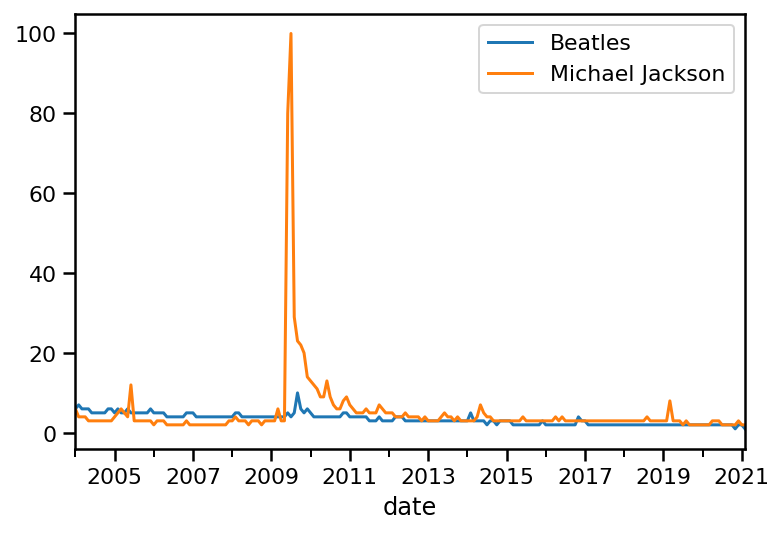

In [19]:
data.plot() #time-series plot

In [20]:
#Prophet requiere que la columna de fecha se llame 'ds' y la serie 'y' --- El ejemplo se hace para la serie de Julia
data['ds'] = data.index
data = data[['ds','Beatles']]
data = data.rename(columns = {'Beatles':'y'})

In [31]:
data.size

412

In [32]:
data

,ds,y
date,,
2004-01-01,2004-01-01,6
2004-02-01,2004-02-01,7
2004-03-01,2004-03-01,6
2004-04-01,2004-04-01,6
2004-05-01,2004-05-01,6
...,...,...
2020-10-01,2020-10-01,2
2020-11-01,2020-11-01,1
2020-12-01,2020-12-01,2


In [21]:
data.dtypes #Check formatos

ds    datetime64[ns]
y              int32
dtype: object

In [22]:
#Fijar el intervalo de confianza del forecast a 95% 
prueba_prophet = Prophet(interval_width=0.95)

In [23]:
#Prophet fit
prueba_prophet.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
#Periodos de forecast
future_dates = prueba_prophet.make_future_dataframe(periods=24, freq='MS')
future_dates.tail()

,ds
225,2022-10-01
226,2022-11-01
227,2022-12-01
228,2023-01-01
229,2023-02-01


In [25]:
#Predictions
prueba_forecast = prueba_prophet.predict(future_dates)
prueba_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
225,2022-10-01,1.181236,-0.019757,2.397981
226,2022-11-01,1.344127,0.008296,2.543264
227,2022-12-01,1.527640,0.212379,2.689628
228,2023-01-01,1.265307,0.017758,2.562237
229,2023-02-01,1.351710,0.040356,2.563112


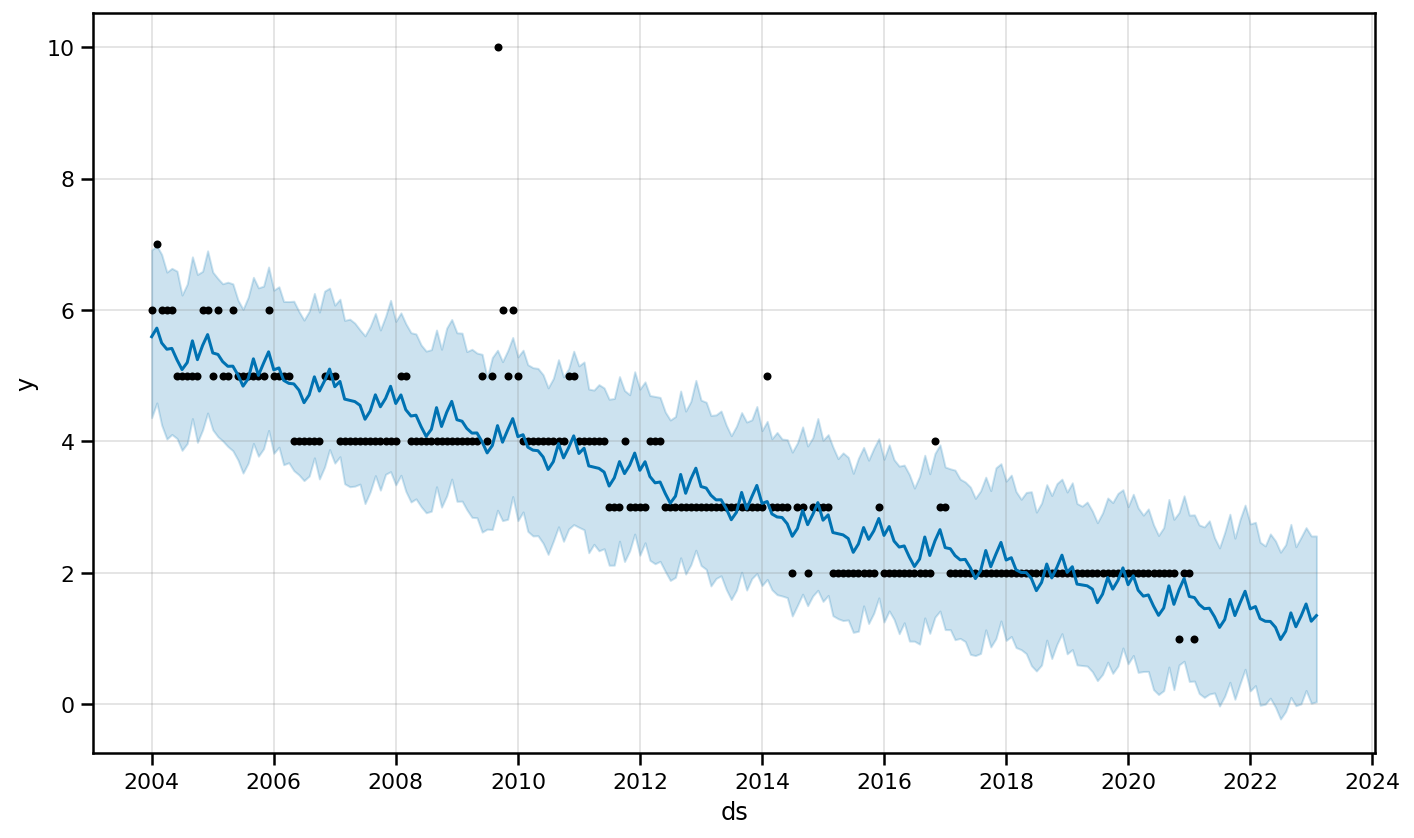

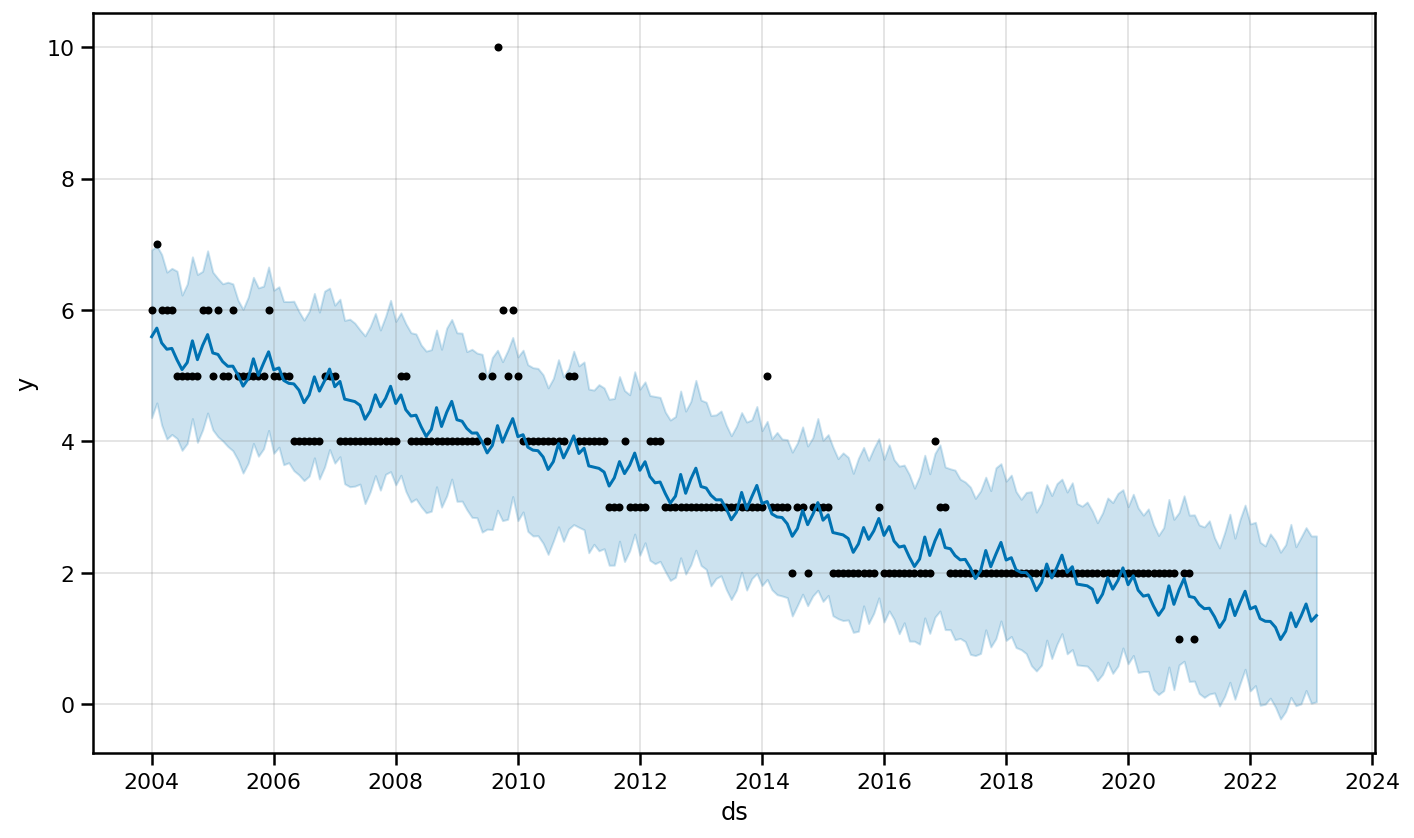

In [26]:
#Time-series & Forecast
prueba_prophet.plot(prueba_forecast,
              uncertainty=True)

In [ ]:
prueba_prophet.plot_components(churos_forecast)

In [30]:
from pytrends import dailydata 
df = dailydata.get_daily_data('Julia', 2020, 1, 2020, 12) #Datos desde enero hasta diciembre 2020

ReadTimeout: HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)